In [ ]:
import os

# Visão Geral

**Este Projeto vai seguir a metodologia CRISP-DM com os seguintes passos**

**Etapa 1: Entendimento do Negócio**

**Etapa 2: Entendimento dos dados**

**etapa 3: Preparação dos dados**

**Etapa 4: Desenvolvimento do estudo**

**Etapa 5: Validação**

**Etapa 6: Implementação do projeto e acompanhamento**

# ETAPA 01: Entendimento do Negócio

A ideia desse projeto é criar um modelo que ajude a identificar pessoas que têm risco de ter doença cardíaca, usando dados clínicos como idade, sexo, pressão arterial, colesterol, entre outros. Doença do coração é algo sério e pode levar a problemas graves, então quanto antes a gente conseguir prever o risco, melhor para o paciente.

Com esse modelo, queremos ajudar médicos e profissionais da saúde a fazer um diagnóstico mais rápido e preciso, facilitando a decisão sobre qual tratamento seguir. Além disso, o uso de machine learning pode mostrar padrões nos dados que não são tão óbvios, ajudando a entender melhor os fatores que levam à doença.

No final, o objetivo é criar uma ferramenta útil que ajude tanto os profissionais quanto os pacientes, melhorando a prevenção e o cuidado com a saúde do coração.


# Importação das bibliotecas

In [3]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest

from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# ETAPA 02: Entendimento dos Dados

A idéia é entender como estão os dados, sua estrutura e verificar se há nulos, NaN e outliers para que sejam tratados no Pré-Processamento na etapa 3

In [4]:
colors = {
  'red': '#780001',
  'blue': '#002F49',
  'light_blue': '#669bbb'
}

In [5]:
base_path = '../dataBase/heart.csv'
df = pd.read_csv(base_path)

In [6]:
print('Visualização da base de dados')
df

Visualização da base de dados


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**DICIONARIO DOS DADOS**

**age**: idade do paciente (anos)

**sex:** sexo (normalmente 1 para masculino, 0 para feminino)

**cp:** tipo de dor no peito (chest pain) — geralmente categorizado em tipos (0,1,2,3 ou 1,2,3,4) indicando diferentes padrões de dor

**trtbps:** pressão arterial em repouso (resting blood pressure) — em mm Hg

**chol:** colesterol sérico (mg/dl)

**fbs:** açúcar no sangue em jejum (fasting blood sugar) — geralmente 1 se maior que 120 mg/dl, 0 caso contrário

**restecg:** resultados do eletrocardiograma em repouso (resting electrocardiographic results) — pode ser categórico (0,1,2)

**thalachh:** frequência cardíaca máxima alcançada (maximum heart rate achieved)

**exng:** se houve exercício induzido (exercise induced angina) — 1 para sim, 0 para não

**oldpeak:** depressão do segmento ST induzida pelo exercício em relação ao repouso (oldpeak)

**slp:** inclinação do segmento ST durante o pico do exercício (slope)

**caa:** número de vasos principais coloridos por fluoroscopia (number of major vessels colored by fluoroscopy)

**thall:** defeito do tálamo (thalassemia) — geralmente categórico (normal, fixo, reversível)

**output:** geralmente é o alvo (target), indicando presença ou ausência da doença (ex: 1 para doença cardíaca, 0 para não)

In [7]:
print('Informações gerais da base de dados\n')
df.info()

Informações gerais da base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
print('Veririficando se existem valores nan\n')
df.isna().sum()

Veririficando se existem valores nan



age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
print('Verificando se existem valores duplicados\n')
if(df.duplicated().sum() > 0):
    print('Existem valores duplicados')
    df = df.drop_duplicates()
else:
    print('Não existem valores duplicados')

Verificando se existem valores duplicados

Existem valores duplicados


**Etapa de Visualização dos Dados**

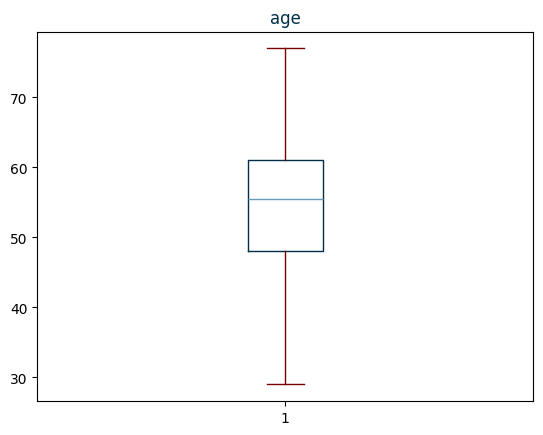

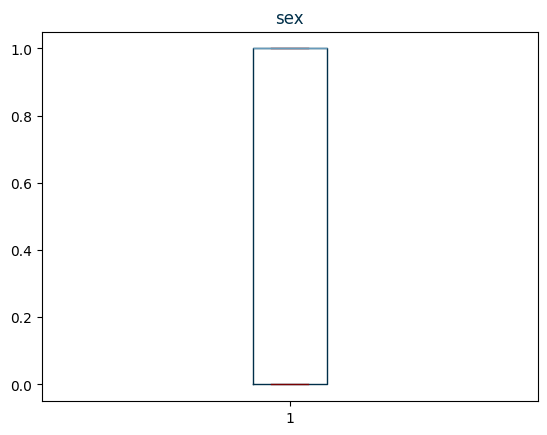

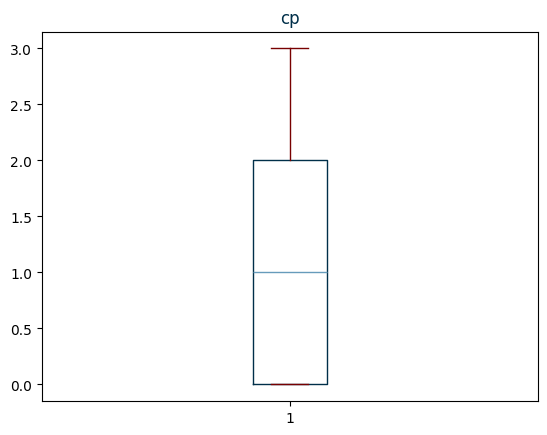

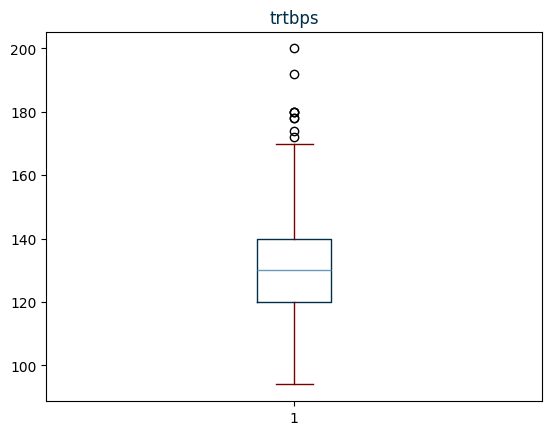

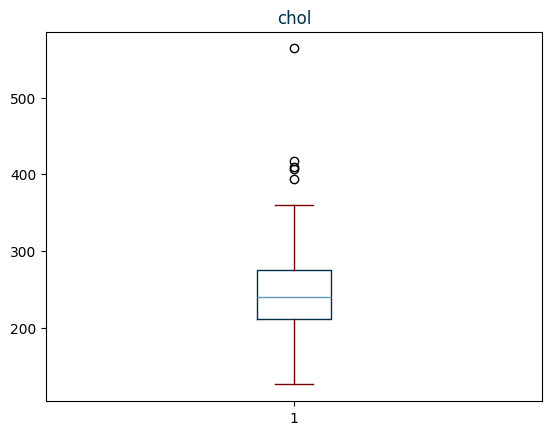

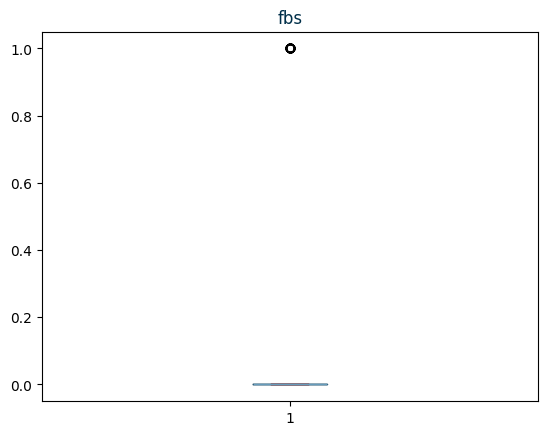

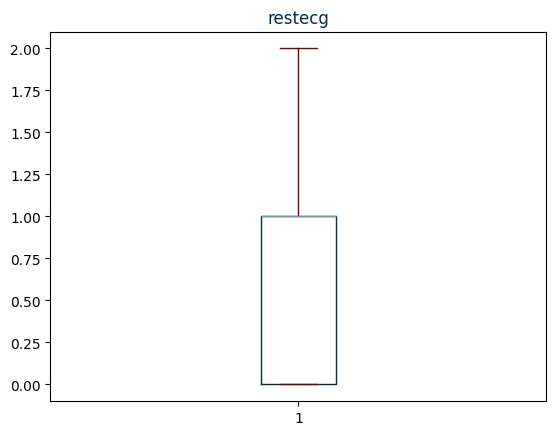

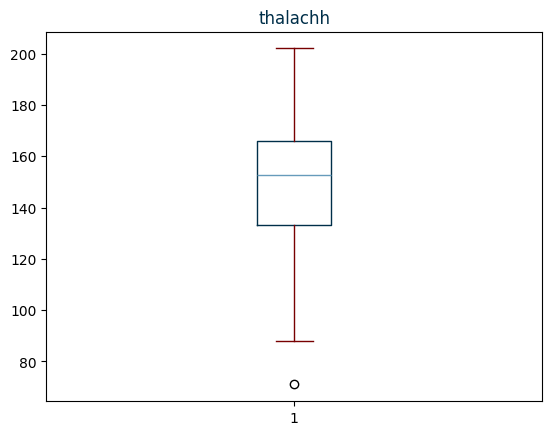

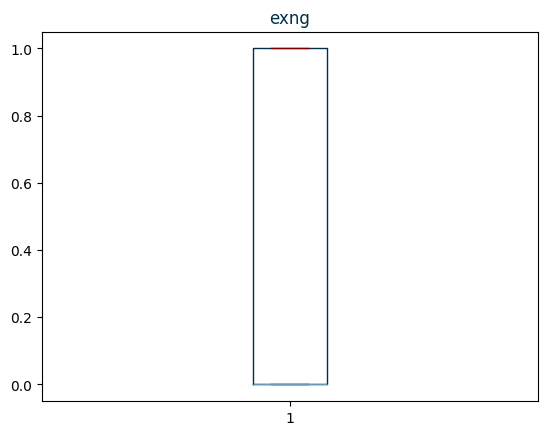

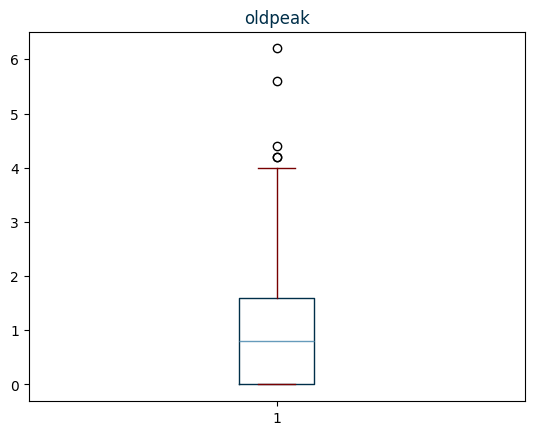

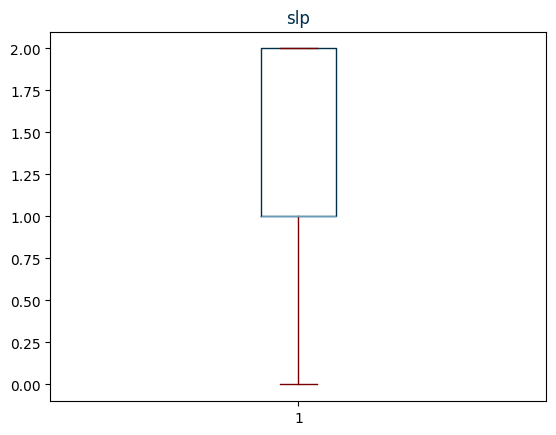

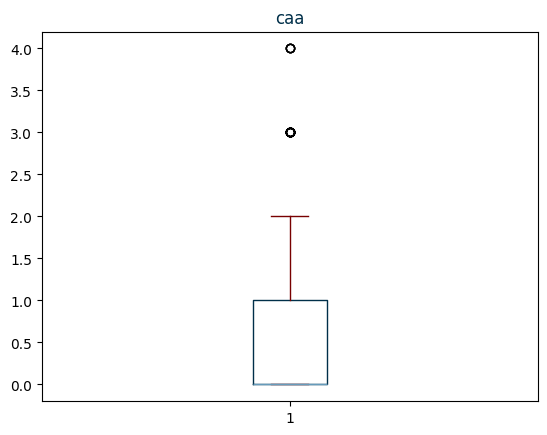

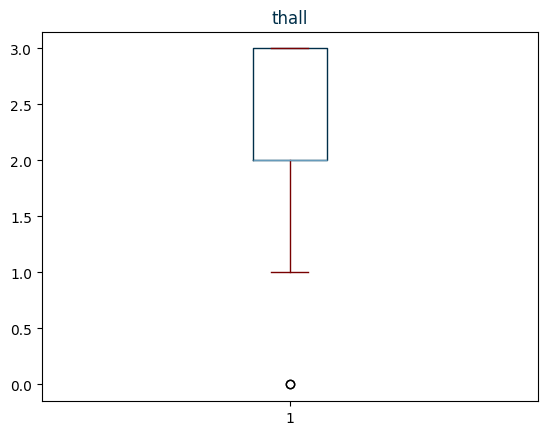

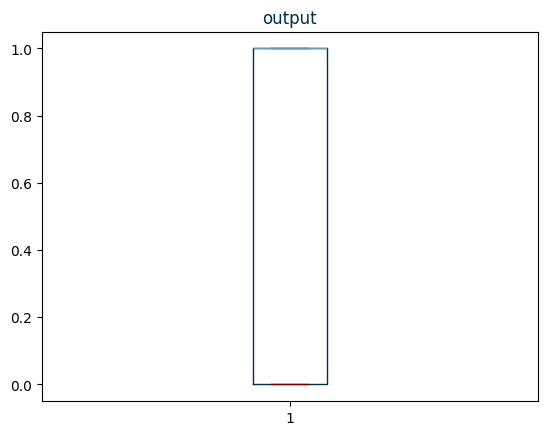

In [10]:
for col in df.columns:
    plt.boxplot(df[col], boxprops=dict(color=colors['blue']), 
                whiskerprops=dict(color=colors['red']), 
                capprops=dict(color=colors['red']), 
                medianprops=dict(color=colors['light_blue']))
    plt.title(col, color=colors['blue'])
    plt.show()

In [11]:
df['caa'].unique()

array([0, 2, 1, 3, 4])

Não faz muito sentido analisar outliers da variavel ``caa`` pois trata de uma variavel categória discreta

In [12]:
outliers_list = ['thalachh', 'oldpeak', 'chol', 'trtbps', 'thall']
for col in outliers_list:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

    print(f'Outliers da coluna {col}')
    display(outliers)

Outliers da coluna thalachh


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


Outliers da coluna oldpeak


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


Outliers da coluna chol


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


Outliers da coluna trtbps


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


Outliers da coluna thall


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Após uma análise detalhada sobre cada uma dessas variáveis, chegamos a conclusão de que faz total sentido deixar os outliers pois relatam a realidade dos exames

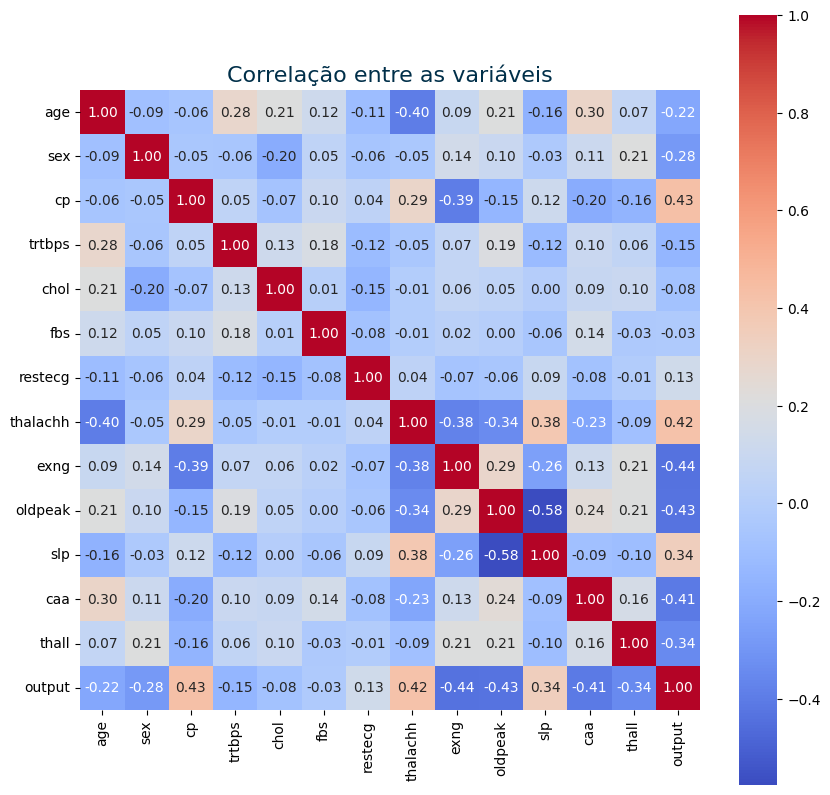

In [13]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap=sns.color_palette("coolwarm", as_cmap=True), square=True)
plt.title('Correlação entre as variáveis', color=colors['blue'], fontsize=16)
plt.show()

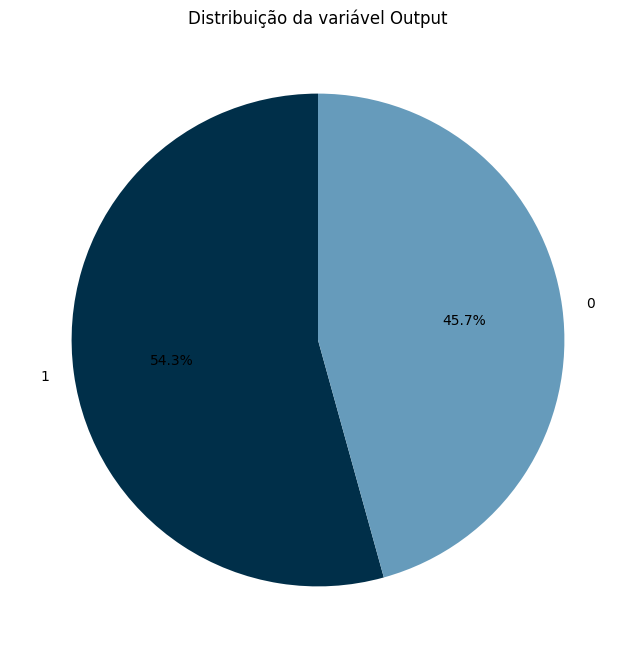

In [14]:
output_counts = df['output'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors['blue'], colors['light_blue']])
plt.title('Distribuição da variável Output')
plt.show()

Dados estão relativamentes equilibrados, não aplicaremos o balanceamento caso o resultado do modelo seja satisfatório

Verificando a distribuição das variáveis


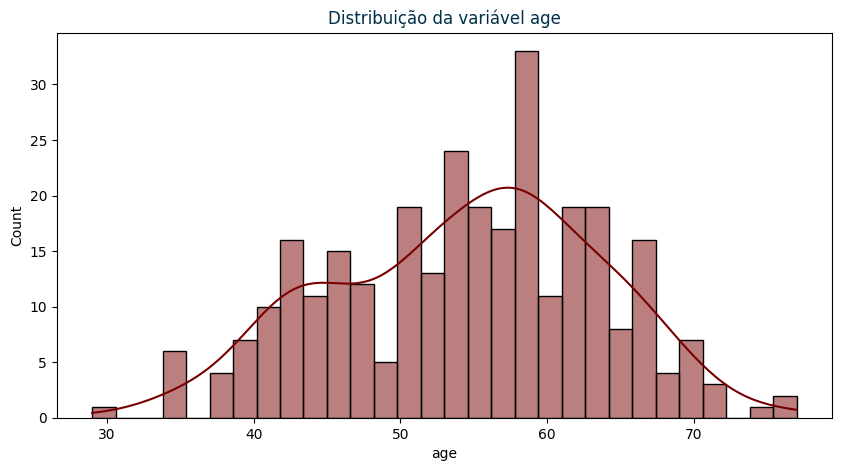

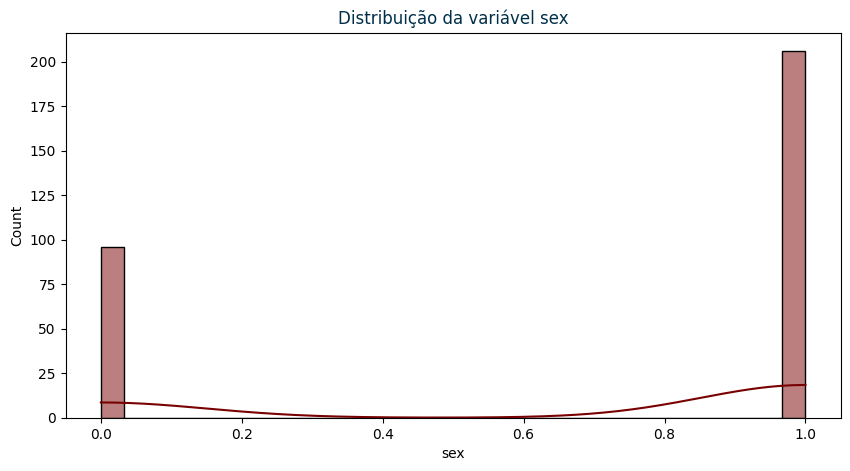

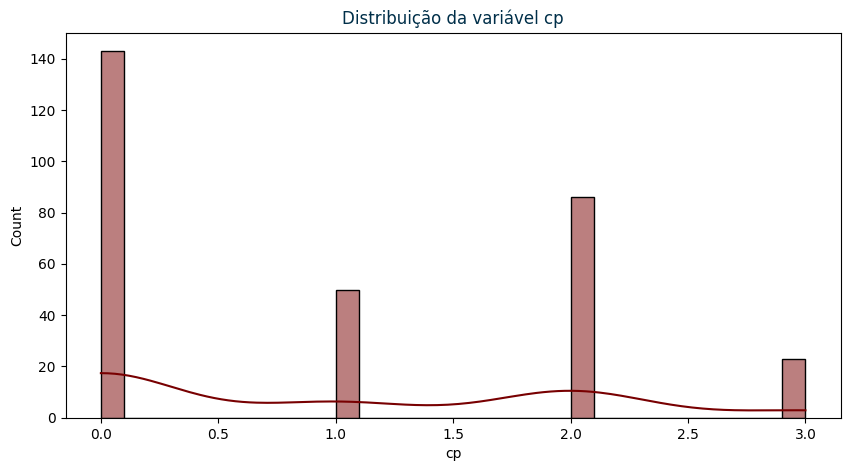

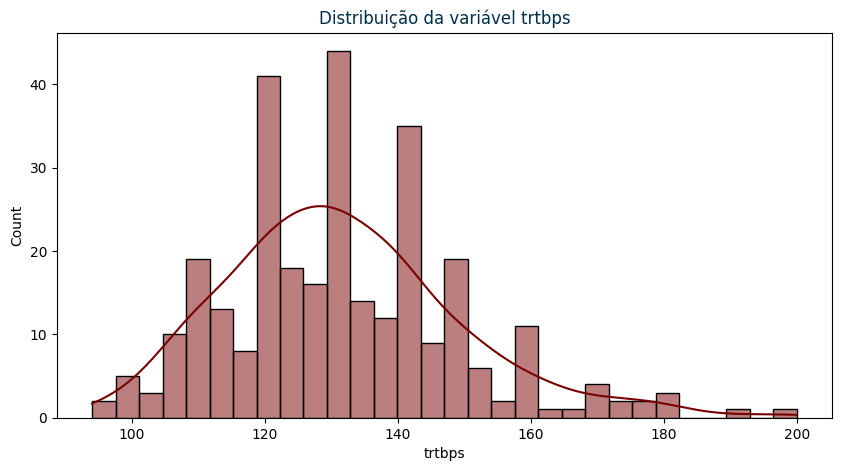

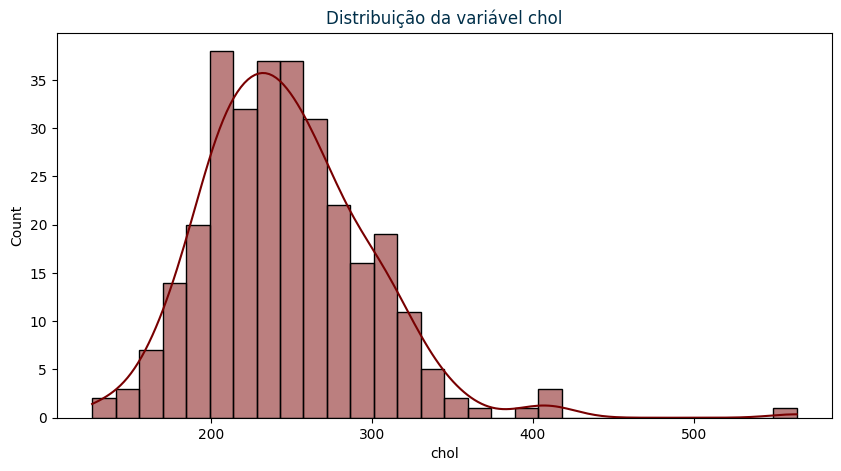

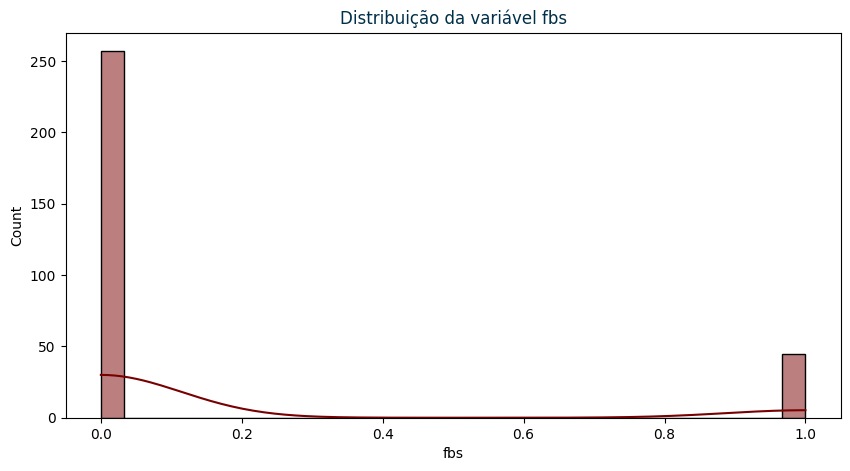

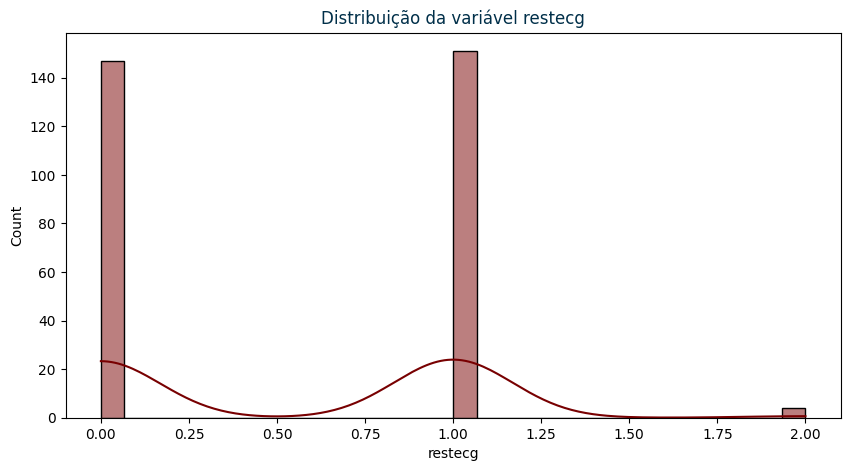

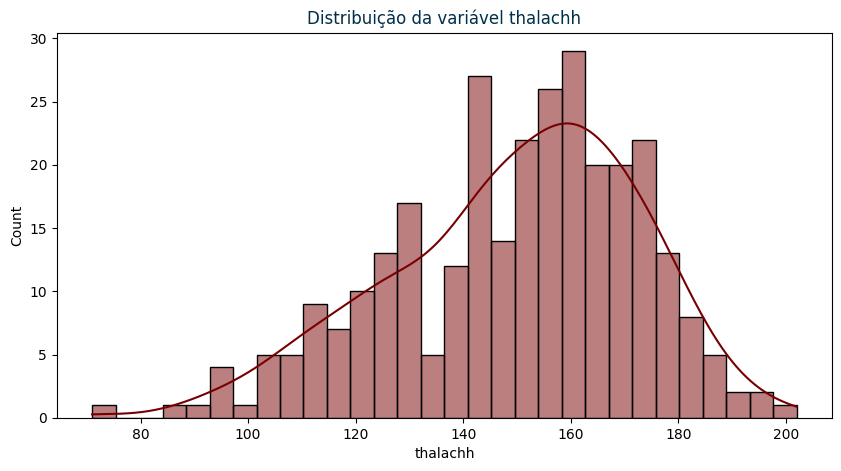

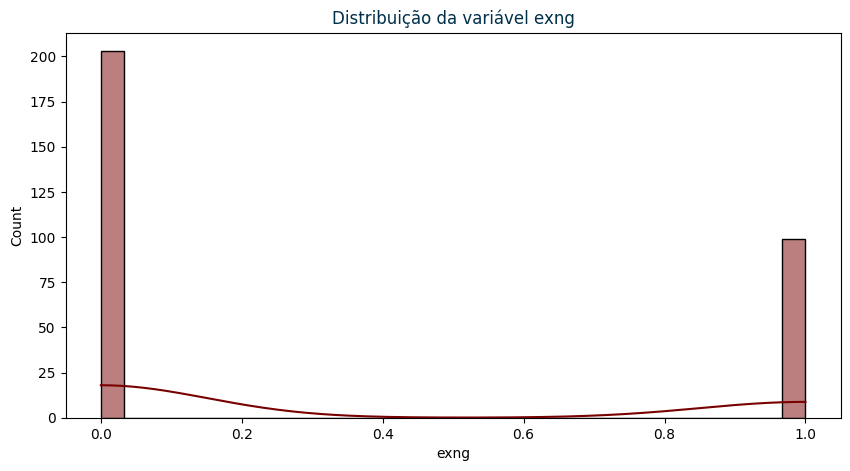

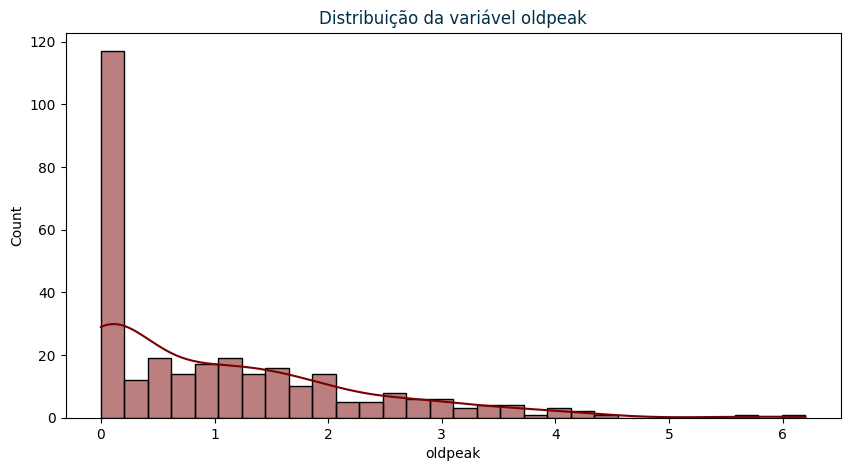

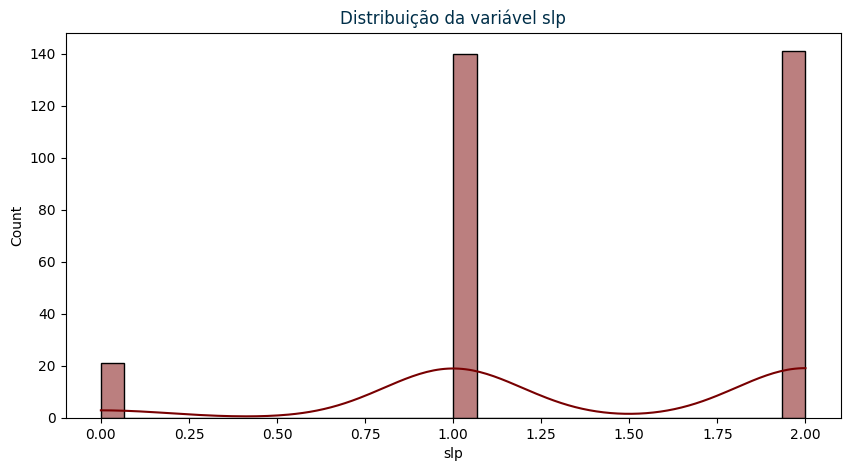

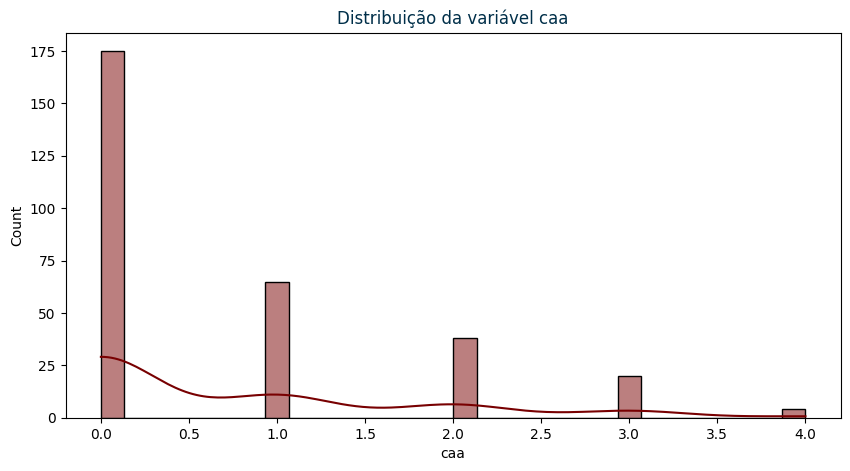

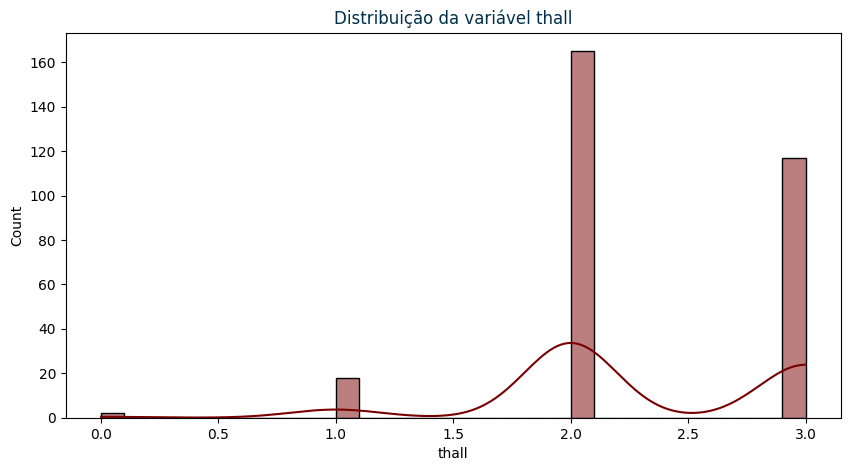

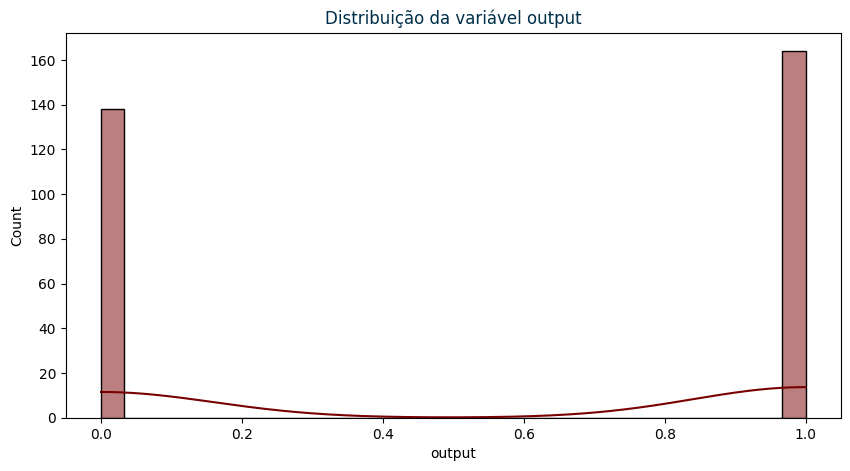

In [15]:
print('Verificando a distribuição das variáveis')
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color=colors['red'], bins=30)
    plt.title(f'Distribuição da variável {col}', color=colors['blue'])
    plt.show()

In [16]:
normal_test_results = []
for col in df:
    stat, p = normaltest(df[col])

    if p < 0.05:
        normal_test_results.append((col))
    else:
        print(f'A variável {col} segue uma distribuição normal (p-value: {p:.4f})\n')


if normal_test_results:
    print(f'As variáveis {normal_test_results} não seguem uma distribuição normal, será necessário normalizá-las')

As variáveis ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'] não seguem uma distribuição normal, será necessário normalizá-las


# Etapa 03: Preparação dos dados

In [17]:
import sys
import os

# Adiciona o caminho da pasta do projeto ao sys.path
sys.path.append(os.path.abspath('..'))

import importlib
import utils.preprocessing
importlib.reload(utils.preprocessing)


from utils.preprocessing import MinMaxScalerClass # classe propria

In [18]:
base_path = '../dataBase/heart.csv'
df = pd.read_csv(base_path)

In [19]:
X = df.drop(columns=['output'])
y = df['output']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScalerClass()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

# Etapa 04 e 05: Desenvolvimento do estudo e Validação

In [21]:
print('Fazendo a previsão com o modelo Random Forest')
model = RandomForestClassifier(random_state=42,
                               bootstrap=False,
                               max_depth=None,
                               min_samples_leaf=4,
                               min_samples_split=10,
                               n_estimators=50
                               )
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Fazendo a previsão com o modelo Random Forest
Acurácia do modelo: 0.85


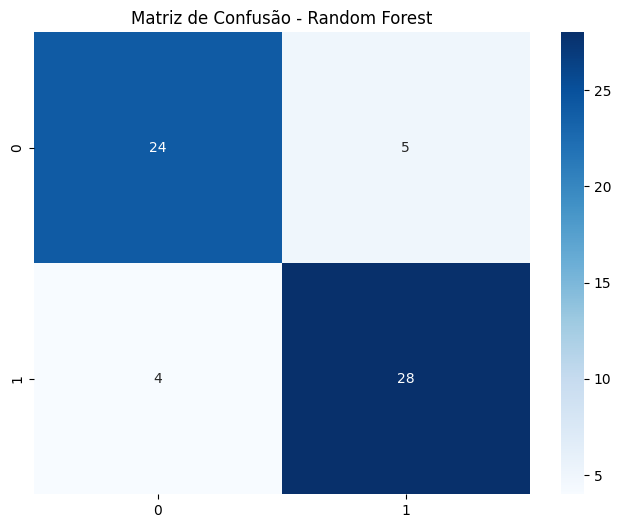

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

In [23]:
svm_model = SVC(kernel='linear',probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do modelo SVM: {accuracy_svm:.2f}")

Acurácia do modelo SVM: 0.89


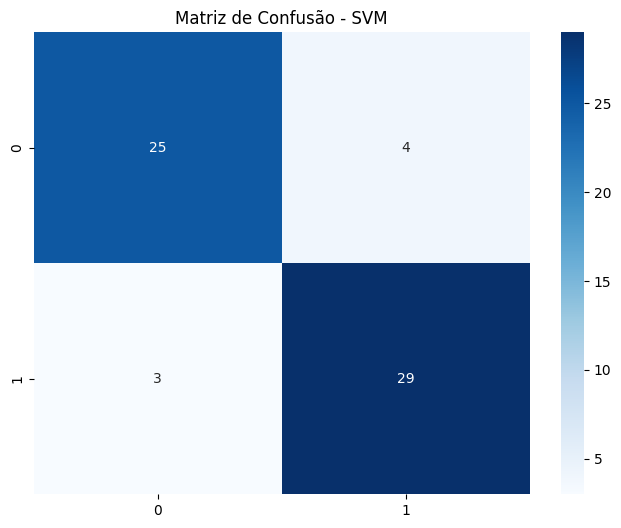

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - SVM')
plt.show()

In [ ]:
# with open('svm_model.pkl', 'wb') as file:
#     pickle.dump(svm_model, file)